In [1]:
# set working directory 
import os 
DIR= "C:/Users/stlin/Dropbox/Udacity/Machine Learning/Lecture/final_project/"
os.chdir(DIR)
print('Your current working directory: \n', os.getcwd())
print('\nContents in your curent working directory: \n', os.listdir("."))


Your current working directory: 
 C:\Users\stlin\Dropbox\Udacity\Machine Learning\Lecture\final_project

Contents in your curent working directory: 
 ['Backup', 'emails_by_address', 'enron61702insiderpay.pdf', 'feature_format.py', 'feature_format.pyc', 'final_project_dataset.pkl', 'final_project_dataset_modified.pkl', 'poi_email_addresses.py', 'poi_id.py', 'poi_names.txt', 'tester.py', 'tester.pyc', '__pycache__']


To load the dataset for Enron project.

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

enron_data = pickle.load(open('final_project_dataset.pkl', "rb"))

In [3]:
enron_data

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

To load the dataset into dataframe format for easier processing.

In [4]:
df_data = pd.DataFrame(enron_data)
df_data = df_data.transpose().reset_index()

In [5]:
df_data

,index,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
1,BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
2,BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
3,BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
4,BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
5,BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
6,BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
7,BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
8,BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
9,BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


To see how many features are in the dataset. 
Below it shows 22 columns, included POI's name with heaader name "index", and whether it is POI (True/False) in "poi" column. 14 columns are Financial features, and 6 columns are Email features.

In [6]:
print(df_data.shape)
df_data.columns

(146, 22)


Index(['index', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object')

Below to replace the string NaN as np.nan.

In [7]:
df_data.replace('NaN',np.nan,inplace=True)

Now it gives me a sense how many np.nan is in each features, the np.nan stands for 0 or none granted, such as loan advances only appear to 4 individual shown below. 

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
index                        146 non-null object
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt

I decide to make all np.nan to 0 as it usually signal 0, and it is more friendly for machine learning algorithm.

In [9]:
df_data.fillna(0, inplace = True)

Below to see all record marked as POI, and it shows there are 18 POI out of the total 146 records.

In [75]:
print('Total number of POI:',len(df_data[df_data['poi']==True]))
df_data[df_data['poi']==True]

Total number of POI: 18


,poi,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,ratio email from poi,ratio email to poi,ratio of total payment vs bonus,ratio of total stock vs exercised stock
index,,,,,,,,,,,,,,,,,,,,,
BELDEN TIMOTHY N,True,5249999.0,2144013.0,-2334434.0,0.0,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0,0.028532,0.223140,0.954262,0.858136
BOWEN JR RAYMOND M,True,1350000.0,0.0,-833.0,0.0,raymond.bowen@enron.com,0.0,65907.0,27.0,140.0,...,0.0,278601.0,1593.0,1858.0,2669589.0,252055.0,0.075350,0.555556,0.505696,0.000000
CALGER CHRISTOPHER F,True,1250000.0,0.0,-262500.0,0.0,christopher.calger@enron.com,0.0,35818.0,144.0,199.0,...,0.0,240189.0,2188.0,2598.0,1639297.0,126027.0,0.076597,0.173611,0.762522,0.000000
CAUSEY RICHARD A,True,1000000.0,0.0,-235000.0,0.0,richard.causey@enron.com,0.0,30674.0,49.0,58.0,...,0.0,415189.0,1585.0,1892.0,1868758.0,2502063.0,0.030655,0.244898,0.535115,0.000000
COLWELL WESLEY,True,1200000.0,27610.0,-144062.0,0.0,wes.colwell@enron.com,0.0,16514.0,40.0,240.0,...,0.0,288542.0,1132.0,1758.0,1490344.0,698242.0,0.136519,0.275000,0.805183,0.000000
DELAINEY DAVID W,True,3000000.0,0.0,0.0,0.0,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,0.0,365163.0,2097.0,3093.0,4747979.0,3614261.0,0.021339,0.198436,0.631848,0.633909
FASTOW ANDREW S,True,1300000.0,0.0,-1386055.0,0.0,andrew.fastow@enron.com,0.0,55921.0,0.0,0.0,...,0.0,440698.0,0.0,0.0,2424083.0,1794412.0,0.000000,0.000000,0.536285,0.000000
GLISAN JR BEN F,True,600000.0,0.0,0.0,0.0,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,...,0.0,274975.0,874.0,873.0,1272284.0,778546.0,0.059565,0.375000,0.471593,0.494162
HANNON KEVIN P,True,1500000.0,0.0,-3117011.0,0.0,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,0.0,243293.0,1035.0,1045.0,288682.0,6391065.0,0.030622,0.656250,5.196029,0.866522


Below to import library for machine learning purpose.

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score, accuracy_score, auc
from sklearn.model_selection import train_test_split

First attempt to take a look of the distribution of the data by putting it to scatter plot for bonus and salary.

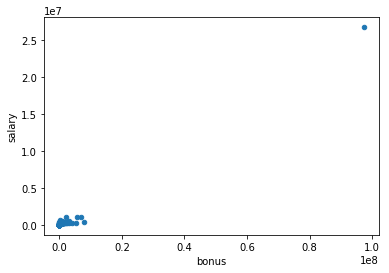

In [11]:
df_data.plot.scatter(x = 'bonus', y = 'salary');

Above shows there is an obvious outlier, so below to sort by bonus to identify the outlier.

In [12]:
cols = df_data.columns.tolist()
cols

['index',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [13]:
# To reorder the dataframe for easier checking in dataframe to look at the POI column.
cols = ['index',
 'poi',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']
df_data = df_data[cols]

In [14]:
df_data.sort_values(by=['bonus'],axis=0, ascending=False,inplace=False).head(10)  # find top 10.

,index,poi,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
130,TOTAL,False,97343619.0,32083396.0,-27992891.0,1398517.0,0,311764000.0,5235198.0,0.0,...,83925000.0,48521928.0,42667589.0,130322299.0,-7576788.0,26704229.0,0.0,0.0,309886585.0,434509511.0
78,LAVORATO JOHN J,False,8000000.0,0.0,0.0,0.0,john.lavorato@enron.com,4158995.0,49537.0,2585.0,...,0.0,2035380.0,1552.0,1008149.0,0.0,339288.0,3962.0,7259.0,10425757.0,5167144.0
79,LAY KENNETH L,True,7000000.0,202911.0,-300000.0,0.0,kenneth.lay@enron.com,34348384.0,99832.0,36.0,...,81525000.0,3600000.0,10359729.0,14761694.0,0.0,1072321.0,2411.0,4273.0,103559793.0,49110078.0
122,SKILLING JEFFREY K,True,5600000.0,0.0,0.0,0.0,jeff.skilling@enron.com,19250000.0,29336.0,108.0,...,0.0,1920000.0,22122.0,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
7,BELDEN TIMOTHY N,True,5249999.0,2144013.0,-2334434.0,0.0,tim.belden@enron.com,953136.0,17355.0,484.0,...,0.0,0.0,210698.0,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
0,ALLEN PHILLIP K,False,4175000.0,2869717.0,-3081055.0,0.0,phillip.allen@enron.com,1729541.0,13868.0,2195.0,...,0.0,304805.0,152.0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
75,KITCHEN LOUISE,False,3100000.0,0.0,0.0,0.0,louise.kitchen@enron.com,81042.0,5774.0,1728.0,...,0.0,0.0,93925.0,466101.0,0.0,271442.0,3669.0,8305.0,3471141.0,547143.0
31,DELAINEY DAVID W,True,3000000.0,0.0,0.0,0.0,david.delainey@enron.com,2291113.0,86174.0,3069.0,...,0.0,1294981.0,1661.0,1323148.0,0.0,365163.0,2097.0,3093.0,4747979.0,3614261.0
139,WHALLEY LAWRENCE G,False,3000000.0,0.0,0.0,0.0,greg.whalley@enron.com,3282960.0,57838.0,556.0,...,0.0,808346.0,301026.0,2796177.0,0.0,510364.0,3920.0,6019.0,4677574.0,6079137.0
91,MCMAHON JEFFREY,False,2600000.0,0.0,0.0,0.0,jeffrey.mcmahon@enron.com,1104054.0,137108.0,48.0,...,0.0,694862.0,297353.0,558801.0,0.0,370448.0,2228.0,2355.0,4099771.0,1662855.0


The outlier is the "TOTAL" line, so I will drop that by code below.

In [15]:
df_data = df_data[df_data['index'] != 'TOTAL']

Now the outlier "TOTAL" are dropped, it shows more reasonable distribution with most of the individual at left bottom corner while few outlier still remain at different corners.

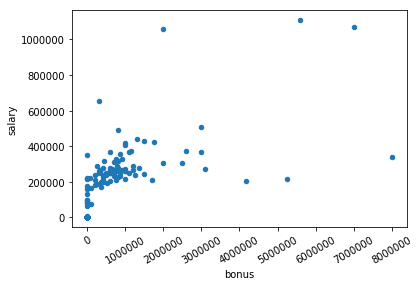

In [16]:
df_data.plot.scatter(x = 'bonus', y = 'salary')
plt.xticks(rotation=30);


To distinguish POI from non-POI in below chart and it shows the top right corner are both POI, which is an indication they have more incentive to commit the fraud with higher salary and bonus.

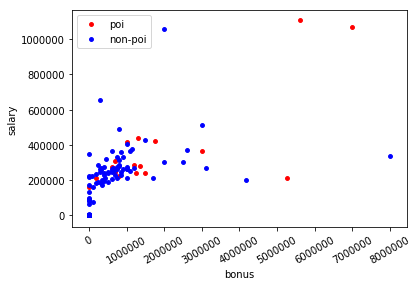

In [17]:
plt.scatter(df_data[df_data['poi']==True]['bonus'], df_data[df_data['poi']==True]['salary'], marker='o', c='r', s=15, label='poi') # marker can make dot smaller
plt.scatter(df_data[df_data['poi']==False]['bonus'], df_data[df_data['poi']==False]['salary'], marker='o', c='b', s=15, label = 'non-poi')
plt.xlabel('bonus')
plt.ylabel('salary')
plt.xticks(rotation=30) # easier to see by rotate x axis number
plt.legend()

Below I hope to look at multiple features's distribution together and distinguish POI from Non-POI, to get a sense of distribution and other outliers.

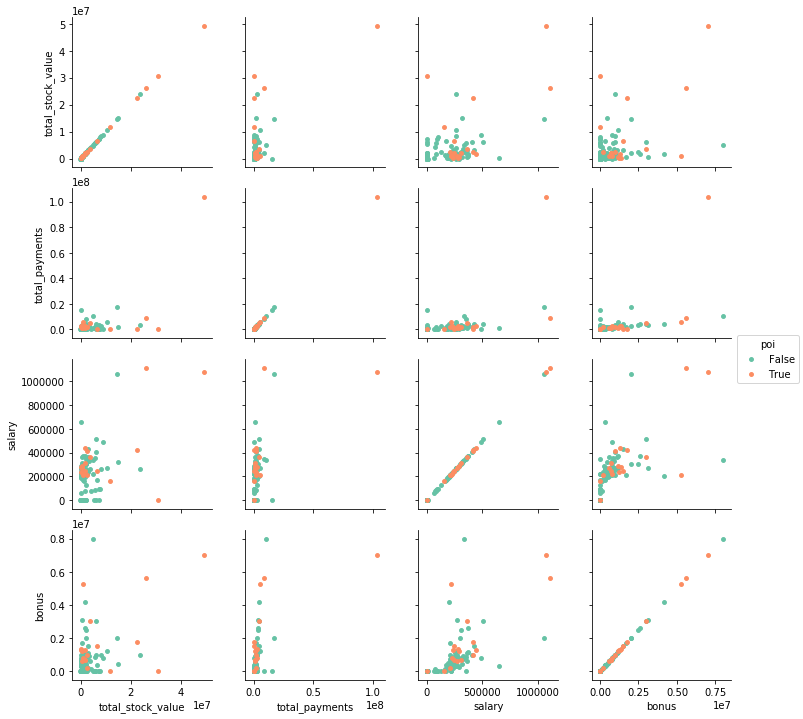

In [18]:
import seaborn as sns #https://seaborn.pydata.org/generated/seaborn.PairGrid.html
plot_grid = sns.PairGrid(df_data, vars=['total_stock_value','total_payments','salary','bonus'], hue='poi', palette='Set2') # palette make color more distinguished

plot_grid.map(plt.scatter, s=15)
plot_grid.add_legend()

The above plot showing that the highest value tend to be the POI, which I think these are good indication for people more inclined to commit fraud, so I won't remove more outliers at this point.

Following I would like to give the initial assessment on each algorithm's performance.

In [19]:
df_data = df_data.set_index('index') # make name to index
my_dataset = df_data.to_dict('index')  # tester's input require my_dataset be in Dictionary format, but not used in my evaluation function

In [20]:
# initially assessment only remove email and poi column
features_list = ['bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value']


In [21]:
features_list.insert(0,'poi')
features_list

['poi',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [22]:
# to import necessary library

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, auc, make_scorer, precision_score, recall_score
from sklearn.model_selection import GridSearchCV  
from sklearn.model_selection import train_test_split  
from sklearn.cross_validation import cross_val_score, StratifiedKFold, StratifiedShuffleSplit


import tester # this is provided by project in order to test the performance metrics (accuracy, precision, recall, F1 score)


C:\Users\stlin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:

clf_tree = DecisionTreeClassifier()
tester.test_classifier(clf_tree, my_dataset, features_list)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.79967	Precision: 0.23370	Recall: 0.22050	F1: 0.22691	F2: 0.22302
	Total predictions: 15000	True positives:  441	False positives: 1446	False negatives: 1559	True negatives: 11554



First evaluation with all features, this could serve as a baseline to compare with subsequent feature selection, feature creation and parameter tuning, and see whether the performance metrix improve.

In [24]:
# To write a function which will run tester function on all 4 algorithms of my interest, so I can check the performance.
import tester

def evaluate_algorithm3(my_dataset, features_list):
    print('Logistic Regression')
    clf = LogisticRegression(random_state=42)
    tester.test_classifier(clf, my_dataset, features_list)
    print('')
    
    print('Decision Tree:')
    clf = DecisionTreeClassifier(random_state=42)
    tester.test_classifier(clf, my_dataset, features_list)
    print('')
    
    print('Random Forest:')
    clf=RandomForestClassifier(random_state=42)
    tester.test_classifier(clf, my_dataset, features_list)
    print('')
    
    print('Ada Boost:')
    clf=AdaBoostClassifier(random_state=42)
    tester.test_classifier(clf, my_dataset, features_list)

In [25]:
%%time
evaluate_algorithm3(my_dataset, features_list)

Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
	Accuracy: 0.78207	Precision: 0.17512	Recall: 0.17100	F1: 0.17303	F2: 0.17181
	Total predictions: 15000	True positives:  342	False positives: 1611	False negatives: 1658	True negatives: 11389


Decision Tree:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.79673	Precision: 0.22322	Recall: 0.21150	F1: 0.21720	F2: 0.21374
	Total predictions: 15000	True positives:  423	False positives: 1472	False negative

I would like to look at F1 score because that is weighted average of Accuracy and Precision. The initial assessment shows Decision Tree and Ada Boost shows higher than Logistic Regression and Random Forest, so I would like to start with Decision Tree and Ada Boost, and to see whether I can improve the F1 score to be higher than this initial assessment by adding new features and select the better features.

Since I decide to look at only Decision Tree and Ada Boost, I will remove the Logistic Regression and Random Forest from my evaluate function.

In [26]:

def evaluate_algorithm3(my_dataset, features_list):
    
    print('Decision Tree:')
    clf = DecisionTreeClassifier(random_state=42)
    tester.test_classifier(clf, my_dataset, features_list)
    print('')

    
    print('Ada Boost:')
    clf=AdaBoostClassifier(random_state=42)
    tester.test_classifier(clf, my_dataset, features_list)

Now, I will add new features. The first is to see for each individual what is the % of email that sent to POI and sent from POI. This could be a better indicator than simply the number of email sent from/to POI. 

In [27]:
df_data['ratio email from poi'] = df_data['from_poi_to_this_person'] / df_data['to_messages']
df_data['ratio email to poi'] = df_data['from_this_person_to_poi'] / df_data['from_messages']

To visualize the new features below, and the scatterplot shows that the red dot (POI) are more centralized in he middle group, which could be an indication these are potentially good features to included for classification purpose.

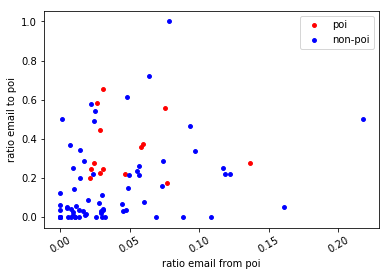

In [28]:
plt.scatter(df_data[df_data['poi']==True]['ratio email from poi'],df_data[df_data['poi']==True]['ratio email to poi'], marker='o', s=15, c='r', label ='poi')
plt.scatter(df_data[df_data['poi']==False]['ratio email from poi'],df_data[df_data['poi']==False]['ratio email to poi'], marker='o', s=15, c='b', label = 'non-poi')
plt.xticks(rotation=30)
plt.xlabel('ratio email from poi')
plt.ylabel('ratio email to poi')
plt.legend()

Let's evaluate whether the added features can potentially improve the performance metrics.

In [29]:
# To make sure the newly created features don't include the nan, to avoid error in machine learning algorithms.
df_data.fillna(0,inplace=True)
df_data = df_data.replace([np.inf,-np.inf],0)

In [30]:
features_list.append('ratio email from poi')
features_list.append('ratio email to poi')
my_dataset = df_data.to_dict('index') 

In [31]:
%%time
evaluate_algorithm3(my_dataset, features_list)

Decision Tree:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.81987	Precision: 0.31642	Recall: 0.30250	F1: 0.30930	F2: 0.30519
	Total predictions: 15000	True positives:  605	False positives: 1307	False negatives: 1395	True negatives: 11693


Ada Boost:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)
	Accuracy: 0.84180	Precision: 0.37641	Recall: 0.28400	F1: 0.32374	F2: 0.29866
	Total predictions: 15000	True positives:  568	False positives:  941	False negatives: 1432	True negatives: 12059

Wall time: 1min 14s


The 2 email ratio features improve the Decision tree's F1 score from 21% to 31%, which is pretty significant. However, it slightly lower the Ada Boost F1 score from 34% to 32%.

Below to add another 2 features for ratio of bonus over total payments, and ratio of exercised stock over total stock. I am thinking that bonus is considered a way to obtain large amount of money in short amount of time, and a larger proportion of bonus over total payment may signal a special type of favor that are granted due to collaboration of fraud.  And larger proportion of exercised stock option over total stock may signal a fraud insider who may be granted larger stock option as an incentive, but are aware of the fraud activity so are less confident to company's future and think of a way to exit, so exercise larger share the stock option.

In [32]:
df_data['ratio of total payment vs bonus'] = df_data['bonus'] / df_data['total_payments']
df_data['ratio of total stock vs exercised stock'] = df_data['exercised_stock_options'] / df_data['total_stock_value']


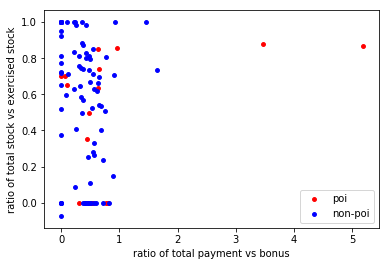

In [33]:
# To visualize it.
plt.scatter(df_data[df_data['poi']==True]['ratio of total payment vs bonus'], df_data[df_data['poi']==True]['ratio of total stock vs exercised stock'], marker='o', c='r', s=15, label='poi') # marker can make dot smaller
plt.scatter(df_data[df_data['poi']==False]['ratio of total payment vs bonus'], df_data[df_data['poi']==False]['ratio of total stock vs exercised stock'], marker='o', c='b', s=15, label = 'non-poi')
plt.xlabel('ratio of total payment vs bonus')
plt.ylabel('ratio of total stock vs exercised stock')
#plt.xticks(rotation=30) # easier to see by rotate x axis number
plt.legend()

In [34]:
df_data.sort_values(by=['ratio of total payment vs bonus'],axis=0, ascending=False,inplace=False).head(10)  # find top 10.

,poi,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,ratio email from poi,ratio email to poi,ratio of total payment vs bonus,ratio of total stock vs exercised stock
index,,,,,,,,,,,,,,,,,,,,,
HANNON KEVIN P,True,1500000.0,0.0,-3117011.0,0.0,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,0.0,243293.0,1035.0,1045.0,288682.0,6391065.0,0.030622,0.656250,5.196029,0.866522
RICE KENNETH D,True,1750000.0,0.0,-3504386.0,0.0,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,0.0,420636.0,864.0,905.0,505050.0,22542539.0,0.046409,0.222222,3.465003,0.878081
ELLIOTT STEVEN,False,350000.0,0.0,-400729.0,0.0,steven.elliott@enron.com,4890344.0,78552.0,0.0,0.0,...,0.0,170941.0,0.0,0.0,211725.0,6678735.0,0.000000,0.000000,1.653088,0.732226
DERRICK JR. JAMES V,False,800000.0,0.0,-1284000.0,0.0,james.derrick@enron.com,8831913.0,51124.0,909.0,64.0,...,-1787380.0,492375.0,1401.0,2181.0,550981.0,8831913.0,0.029344,0.022002,1.451956,1.000000
BELDEN TIMOTHY N,True,5249999.0,2144013.0,-2334434.0,0.0,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0,0.028532,0.223140,0.954262,0.858136
ALLEN PHILLIP K,False,4175000.0,2869717.0,-3081055.0,0.0,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,...,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,0.016196,0.029613,0.930997,1.000000
DONAHUE JR JEFFREY M,False,800000.0,0.0,-300000.0,0.0,jeff.donahue@enron.com,765920.0,96268.0,22.0,188.0,...,0.0,278601.0,772.0,865.0,875760.0,1080988.0,0.217341,0.500000,0.913492,0.708537
KITCHEN LOUISE,False,3100000.0,0.0,0.0,0.0,louise.kitchen@enron.com,81042.0,5774.0,1728.0,251.0,...,0.0,271442.0,3669.0,8305.0,3471141.0,547143.0,0.030223,0.112269,0.893078,0.148118
HICKERSON GARY J,False,1700000.0,0.0,0.0,0.0,gary.hickerson@enron.com,0.0,98849.0,27.0,40.0,...,0.0,211788.0,900.0,1320.0,2081796.0,441096.0,0.030303,0.037037,0.816603,0.000000


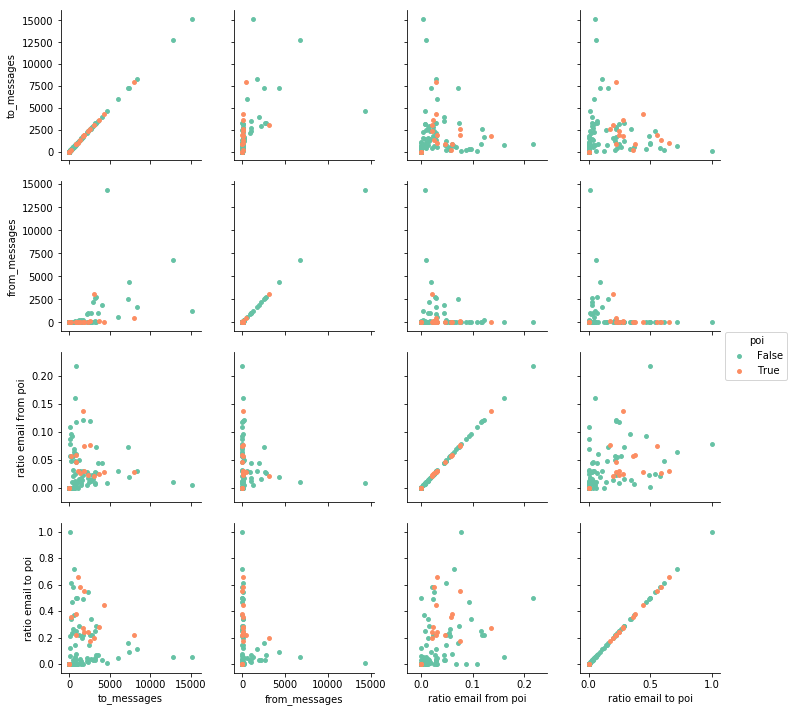

In [35]:
plot_grid = sns.PairGrid(df_data, vars=['to_messages','from_messages','ratio email from poi','ratio email to poi'], hue='poi', palette='Set2') # palette make color more distinguished

plot_grid.map(plt.scatter, s=15)
plot_grid.add_legend()

In [36]:
df_data.fillna(0, inplace = True)
df_data = df_data.replace([np.inf,-np.inf],0) #https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas

To test again the performance metrics with newly added features. 

In [37]:
features_list.append('ratio of total payment vs bonus')
features_list.append('ratio of total stock vs exercised stock')
my_dataset = df_data.to_dict('index')


In [38]:
%%time
evaluate_algorithm3(my_dataset, features_list)

Decision Tree:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.81420	Precision: 0.30096	Recall: 0.29750	F1: 0.29922	F2: 0.29819
	Total predictions: 15000	True positives:  595	False positives: 1382	False negatives: 1405	True negatives: 11618


Ada Boost:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)
	Accuracy: 0.84007	Precision: 0.37317	Recall: 0.29350	F1: 0.32858	F2: 0.30659
	Total predictions: 15000	True positives:  587	False positives:  986	False negatives: 1413	True negatives: 12014

Wall time: 1min 8s


These two newly added features don't help the F1 score, but I would keep it for now and determine whether to keep it later.

## Features selection
Above is on feature creation, and I would keep the new features for now, and determine what features to use in my final selection. I will use the following to test on the features importance for each features. 

In [39]:
# plot feature importance
#https://github.com/willemolding/IdentifyFraudEnron/blob/master/.ipynb_checkpoints/scratchpad-checkpoint.ipynb

import operator, pprint, collections

def plot_features_importance(clf, X, y):
    clf.fit(X,y)
    importance = sorted(zip(X.columns, clf.feature_importances_), key=operator.itemgetter(1))[::-1]
    importance = collections.OrderedDict(importance)
    plt.bar(range(len(importance)), importance.values(), align='center')
    plt.xticks(range(len(importance)),importance.keys(), rotation='vertical')
    plt.title('Feature Importance')
    plt.ylabel('Importance')
    plt.show()
    return importance

In [40]:
features_list.remove('poi')
X = df_data[features_list]
y = df_data['poi']
features_list

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'ratio email from poi',
 'ratio email to poi',
 'ratio of total payment vs bonus',
 'ratio of total stock vs exercised stock']

In [41]:
features_list = ['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'ratio email from poi',
 'ratio email to poi',
 'ratio of total payment vs bonus',
 'ratio of total stock vs exercised stock']

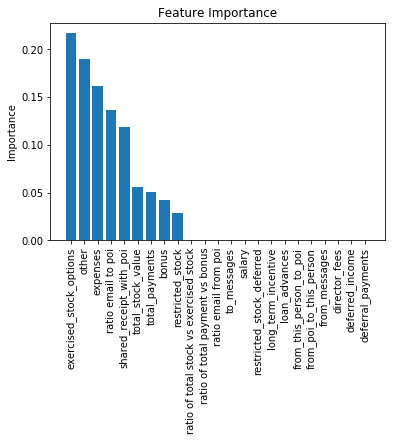

OrderedDict([('exercised_stock_options', 0.21677011118291087),
             ('other', 0.18994891263592051),
             ('expenses', 0.16151489835700364),
             ('ratio email to poi', 0.13649901633967093),
             ('shared_receipt_with_poi', 0.1185191078088922),
             ('total_stock_value', 0.055523084124288379),
             ('total_payments', 0.050743657042869622),
             ('bonus', 0.042286380869058032),
             ('restricted_stock', 0.028194831639385791),
             ('ratio of total stock vs exercised stock', 0.0),
             ('ratio of total payment vs bonus', 0.0),
             ('ratio email from poi', 0.0),
             ('to_messages', 0.0),
             ('salary', 0.0),
             ('restricted_stock_deferred', 0.0),
             ('long_term_incentive', 0.0),
             ('loan_advances', 0.0),
             ('from_this_person_to_poi', 0.0),
             ('from_poi_to_this_person', 0.0),
             ('from_messages', 0.0),
             ('direct

In [42]:
tree_importance = plot_features_importance(DecisionTreeClassifier(random_state = 42), X, y)
tree_importance

The decision tree classifier, the top 1 is exercised stock options, and followed by other, expenses, ratio email to poi etc.  Only the top 9 has features importance.

Following take a look at the ada boost's features importance.  And this time, Other is the highest. The top 16 has feature importance, the rest are 0.

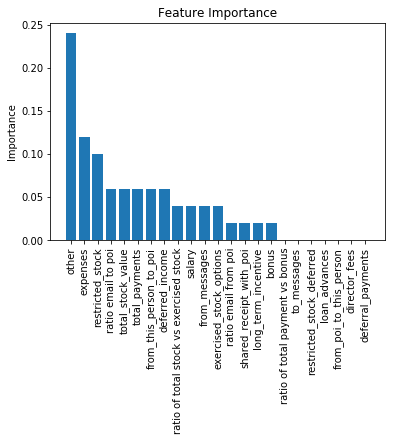

OrderedDict([('other', 0.23999999999999999),
             ('expenses', 0.12),
             ('restricted_stock', 0.10000000000000001),
             ('ratio email to poi', 0.059999999999999998),
             ('total_stock_value', 0.059999999999999998),
             ('total_payments', 0.059999999999999998),
             ('from_this_person_to_poi', 0.059999999999999998),
             ('deferred_income', 0.059999999999999998),
             ('ratio of total stock vs exercised stock', 0.040000000000000001),
             ('salary', 0.040000000000000001),
             ('from_messages', 0.040000000000000001),
             ('exercised_stock_options', 0.040000000000000001),
             ('ratio email from poi', 0.02),
             ('shared_receipt_with_poi', 0.02),
             ('long_term_incentive', 0.02),
             ('bonus', 0.02),
             ('ratio of total payment vs bonus', 0.0),
             ('to_messages', 0.0),
             ('restricted_stock_deferred', 0.0),
             ('loan_adv

In [43]:
Ada_importance = plot_features_importance(AdaBoostClassifier(random_state = 42 ), X, y)
Ada_importance

Let me exclude every feature that have 0 feature importance, and test the performance to see how it performs.

In [44]:
%%time
# On decision tree feature selection.

features_tree = ['poi','exercised_stock_options','other','expenses', 
                 'ratio email to poi','shared_receipt_with_poi','total_stock_value',
             'total_payments','bonus','restricted_stock']

evaluate_algorithm3(my_dataset, features_tree)

Decision Tree:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.83753	Precision: 0.38421	Recall: 0.36250	F1: 0.37304	F2: 0.36664
	Total predictions: 15000	True positives:  725	False positives: 1162	False negatives: 1275	True negatives: 11838


Ada Boost:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)
	Accuracy: 0.85067	Precision: 0.42298	Recall: 0.32950	F1: 0.37043	F2: 0.34474
	Total predictions: 15000	True positives:  659	False positives:  899	False negatives: 1341	True negatives: 12101

Wall time: 1min 22s


Feature selection using features importance by decision tree have improve both Decision tree and Ada boost's F1 score from around 30% to 37%.  Following I will test on features selection based on Ada boost feature importance.

In [45]:
%%time
# On Ada boost feature selection.

features_Ada = ['poi',
                 'other',
                 'expenses',
                 'restricted_stock',
                 'ratio email to poi',
                 'total_stock_value',
                 'total_payments',
                 'from_this_person_to_poi',
                 'deferred_income',
                 'ratio of total stock vs exercised stock',
                 'salary',
                 'from_messages',
                 'exercised_stock_options',
                 'ratio email from poi',
                 'shared_receipt_with_poi',
                 'long_term_incentive',
                 'bonus']

evaluate_algorithm3(my_dataset, features_Ada)

Decision Tree:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.82300	Precision: 0.33179	Recall: 0.32300	F1: 0.32734	F2: 0.32472
	Total predictions: 15000	True positives:  646	False positives: 1301	False negatives: 1354	True negatives: 11699


Ada Boost:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)
	Accuracy: 0.84540	Precision: 0.39245	Recall: 0.29100	F1: 0.33419	F2: 0.30686
	Total predictions: 15000	True positives:  582	False positives:  901	False negatives: 1418	True negatives: 12099

Wall time: 1min 14s


Using features selected based on Ada boost features importance the F1 score is at 32~33%, which is less than the 37% achieved based on decision tree's features importance.

Following I would like to use GridSearchCV to automatically select the best number of features.

In [46]:
# GridSearchCV with SelectKBest to determine the optimal number of features to use
# https://medium.com/@williamkoehrsen/machine-learning-with-python-on-the-enron-dataset-8d71015be26d
# from sklearn.model_selection import GridSearchCV   # this doesn't work when I change to python 2.7 env, see line below
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

n_features = np.arange(1, len(features_list))
pipe = Pipeline([('select_features', SelectKBest()),
                ('classify', DecisionTreeClassifier())])

param_grid = [{'select_features__k': n_features}]

test_tree_clf = GridSearchCV(pipe, param_grid=param_grid, scoring = 'f1', cv =3)
test_tree_clf.fit(X, y)

C:\Users\stlin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=10, score_func=<function f_classif at 0x000000000CA5C510>)), ('classify', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impu...     min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'select_features__k': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [47]:
test_tree_clf.best_params_

{'select_features__k': 9}

In [48]:
#https://github.com/FCH808/FCH808.github.io/blob/master/Intro%20to%20Machine%20Learning/ud120-projects/final_project/poi_id.py

# to show the exact features selected by GridSearchCV
mask = test_tree_clf.best_estimator_.named_steps['select_features'].get_support()
top_features = [x for (x, boolean) in zip(features_list, mask) if boolean]
top_features

['bonus',
 'deferred_income',
 'exercised_stock_options',
 'long_term_incentive',
 'restricted_stock',
 'salary',
 'total_stock_value',
 'ratio email to poi',
 'ratio of total payment vs bonus']

In [49]:
test_tree_clf.best_estimator_

Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=9, score_func=<function f_classif at 0x000000000CA5C510>)), ('classify', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Now I will test the performance using features selected by GridSearchCV on DecisionTree.

In [50]:
features_tree = ['poi','bonus',
 'deferred_income',
 'exercised_stock_options',
 'long_term_incentive',
 'restricted_stock',
 'salary',
 'total_stock_value',
 'ratio email to poi',
 'ratio of total payment vs bonus']
evaluate_algorithm3(my_dataset, features_tree)

Decision Tree:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.78364	Precision: 0.22964	Recall: 0.21850	F1: 0.22393	F2: 0.22064
	Total predictions: 14000	True positives:  437	False positives: 1466	False negatives: 1563	True negatives: 10534


Ada Boost:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)
	Accuracy: 0.81686	Precision: 0.32971	Recall: 0.27300	F1: 0.29869	F2: 0.28273
	Total predictions: 14000	True positives:  546	False positives: 1110	False negatives: 1454	True negatives: 10890



In [51]:
tester.test_classifier(test_tree_clf.best_estimator_, my_dataset, features_tree)

Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=9, score_func=<function f_classif at 0x000000000CA5C510>)), ('classify', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
	Accuracy: 0.78807	Precision: 0.24909	Recall: 0.24000	F1: 0.24446	F2: 0.24176
	Total predictions: 14000	True positives:  480	False positives: 1447	False negatives: 1520	True negatives: 10553



Following I will use GridSearchCV on Adaboost

In [52]:
n_features = np.arange(1, len(features_list))
pipe = Pipeline([('select_features', SelectKBest()),
                ('classify', AdaBoostClassifier())])

param_grid = [{'select_features__k': n_features}]

test_Ada_clf = GridSearchCV(pipe, param_grid=param_grid, scoring = 'f1', cv =3)
test_Ada_clf.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=10, score_func=<function f_classif at 0x000000000CA5C510>)), ('classify', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'select_features__k': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [53]:
test_Ada_clf.best_params_

{'select_features__k': 21}

In [54]:
#https://github.com/FCH808/FCH808.github.io/blob/master/Intro%20to%20Machine%20Learning/ud120-projects/final_project/poi_id.py

# to show the exact features selected by GridSearchCV
mask = test_Ada_clf.best_estimator_.named_steps['select_features'].get_support()
top_features = [x for (x, boolean) in zip(features_list, mask) if boolean]
top_features

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'ratio email from poi',
 'ratio email to poi',
 'ratio of total payment vs bonus']

In [55]:
test_Ada_clf.best_estimator_

Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=21, score_func=<function f_classif at 0x000000000CA5C510>)), ('classify', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])

Now I will test the performance using features selected by GridSearchCV on Ada boost.

In [56]:
features_Ada = ['poi',
                'bonus',
                 'deferral_payments',
                 'deferred_income',
                 'director_fees',
                 'exercised_stock_options',
                 'expenses',
                 'from_messages',
                 'from_poi_to_this_person',
                 'from_this_person_to_poi',
                 'loan_advances',
                 'long_term_incentive',
                 'other',
                 'restricted_stock',
                 'salary',
                 'shared_receipt_with_poi',
                 'to_messages',
                 'total_payments',
                 'total_stock_value',
                 'ratio email from poi',
                 'ratio email to poi',
                 'ratio of total payment vs bonus']
evaluate_algorithm3(my_dataset, features_Ada)

Decision Tree:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.81500	Precision: 0.30260	Recall: 0.29700	F1: 0.29977	F2: 0.29810
	Total predictions: 15000	True positives:  594	False positives: 1369	False negatives: 1406	True negatives: 11631


Ada Boost:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)
	Accuracy: 0.84287	Precision: 0.38295	Recall: 0.29200	F1: 0.33135	F2: 0.30656
	Total predictions: 15000	True positives:  584	False positives:  941	False negatives: 1416	True negatives: 12059



The features selected by GridSearchCV with SelectKBest only improve the F1 score to 33%, which is lower than my previous F1 score 37% achieve if I rely on Features Importance for DecisionTree.
Therefore, following I will use features selected by the top 9 features with highest features importance based on decision tree classifier.

In [57]:

features_tree = ['poi','exercised_stock_options','other','expenses', 
                 'ratio email to poi','shared_receipt_with_poi','total_stock_value',
             'total_payments','bonus','restricted_stock']

## Parameter tuning:
Following I will try further improve the F1 score by tuning the parameter using GridSearch.
I will start with tuning the decision tree.

In [58]:
features_list = ['poi','exercised_stock_options','other','expenses', 
                 'ratio email to poi','shared_receipt_with_poi','total_stock_value',
             'total_payments','bonus','restricted_stock']

In [59]:
clf = DecisionTreeClassifier(random_state=42)
tester.test_classifier(clf, my_dataset, features_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.83753	Precision: 0.38421	Recall: 0.36250	F1: 0.37304	F2: 0.36664
	Total predictions: 15000	True positives:  725	False positives: 1162	False negatives: 1275	True negatives: 11838



Try to tune the Decision Tree's parameter

In [60]:
clf = DecisionTreeClassifier(random_state=42, criterion='entropy')
tester.test_classifier(clf, my_dataset, features_tree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.84387	Precision: 0.41158	Recall: 0.39800	F1: 0.40468	F2: 0.40064
	Total predictions: 15000	True positives:  796	False positives: 1138	False negatives: 1204	True negatives: 11862



In [61]:
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', min_samples_split=3)
tester.test_classifier(clf, my_dataset, features_tree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.84560	Precision: 0.41728	Recall: 0.39850	F1: 0.40767	F2: 0.40212
	Total predictions: 15000	True positives:  797	False positives: 1113	False negatives: 1203	True negatives: 11887



In [62]:
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', min_samples_split=4)
tester.test_classifier(clf, my_dataset, features_tree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.84260	Precision: 0.40777	Recall: 0.39900	F1: 0.40334	F2: 0.40072
	Total predictions: 15000	True positives:  798	False positives: 1159	False negatives: 1202	True negatives: 11841



In [63]:
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', min_samples_split=17)
tester.test_classifier(clf, my_dataset, features_tree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=17,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.86867	Precision: 0.50795	Recall: 0.47900	F1: 0.49305	F2: 0.48452
	Total predictions: 15000	True positives:  958	False positives:  928	False negatives: 1042	True negatives: 12072



In [64]:
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', min_samples_split=17,splitter='best')
tester.test_classifier(clf, my_dataset, features_tree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=17,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.86867	Precision: 0.50795	Recall: 0.47900	F1: 0.49305	F2: 0.48452
	Total predictions: 15000	True positives:  958	False positives:  928	False negatives: 1042	True negatives: 12072



In [65]:
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', min_samples_split=17,splitter='best',max_depth=4,min_samples_leaf=4)
tester.test_classifier(clf, my_dataset, features_tree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=17,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.88220	Precision: 0.56989	Recall: 0.47500	F1: 0.51813	F2: 0.49136
	Total predictions: 15000	True positives:  950	False positives:  717	False negatives: 1050	True negatives: 12283



## Above gives the highest F1 score so far and above 0.3 for all paramters, so I will stop here for DecisionTreeClassifier

### Now I will try tuning the Ada boost algorithm

In [221]:
%%time
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(random_state=42)
tester.test_classifier(clf, my_dataset, features_tree)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)
	Accuracy: 0.85067	Precision: 0.42298	Recall: 0.32950	F1: 0.37043	F2: 0.34474
	Total predictions: 15000	True positives:  659	False positives:  899	False negatives: 1341	True negatives: 12101

Wall time: 1min 26s


In [222]:
%%time
clf = AdaBoostClassifier(random_state=42, base_estimator=RandomForestClassifier())
tester.test_classifier(clf, my_dataset, features_tree)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=42)
	Accuracy: 0.85093	Precision: 0.40422	Recall: 0.24900	F1: 0.30817	F2: 0.26971
	Total predictions: 15000	True positives:  498	False positives:  734	False negatives: 1502	True negatives: 12266

Wall time: 7min 18s


In [223]:
%%time
clf = AdaBoostClassifier(random_state=42, base_estimator=GaussianNB())
tester.test_classifier(clf, my_dataset, features_tree)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=GaussianNB(priors=None), learning_rate=1.0,
          n_estimators=50, random_state=42)
	Accuracy: 0.76720	Precision: 0.22774	Recall: 0.31200	F1: 0.26329	F2: 0.29050
	Total predictions: 15000	True positives:  624	False positives: 2116	False negatives: 1376	True negatives: 10884

Wall time: 1min 19s


In [224]:
%%time
clf = AdaBoostClassifier(random_state=42, base_estimator=DecisionTreeClassifier(), n_estimators=20)
tester.test_classifier(clf, my_dataset, features_tree)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=20, random_state=42)
	Accuracy: 0.83873	Precision: 0.38862	Recall: 0.36550	F1: 0.37671	F2: 0.36990
	Total predictions: 15000	True positives:  731	False positives: 1150	False negatives: 1269	True negatives: 11850

Wall time: 4.18 s


In [232]:
%%time
clf = AdaBoostClassifier(random_state=42, base_estimator=DecisionTreeClassifier())
tester.test_classifier(clf, my_dataset, features_tree)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42)
	Accuracy: 0.83873	Precision: 0.38862	Recall: 0.36550	F1: 0.37671	F2: 0.36990
	Total predictions: 15000	True positives:  731	False positives: 1150	False negatives: 1269	True negatives: 11850

Wall time: 4.34 s


In [237]:
%%time
clf = AdaBoostClassifier(random_state=42, base_estimator=DecisionTreeClassifier(), learning_rate=10)
tester.test_classifier(clf, my_dataset, features_tree)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=10, n_estimators=50, random_state=42)
	Accuracy: 0.83873	Precision: 0.38862	Recall: 0.36550	F1: 0.37671	F2: 0.36990
	Total predictions: 15000	True positives:  731	False positives: 1150	False negatives: 1269	True negatives: 11850

Wall time: 4.35 s


Adaboost doesn't seem an reach to as good as 0.5 as the Decision Tree algorithm provided.

## Concluded: Use DecisionTreeClassifier with 9 features.

### Cross-validation Evaluation

In [66]:
# this is poi.py example for evaluation.
from sklearn.cross_validation import train_test_split
from feature_format import featureFormat, targetFeatureSplit
from sklearn.metrics import f1_score, accuracy_score, auc, make_scorer, precision_score, recall_score

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.25, random_state=42)

clf = DecisionTreeClassifier(random_state=42, criterion='entropy', min_samples_split=17,splitter='best',max_depth=4, min_samples_leaf=4)
    
clf = clf.fit(features_train, labels_train)
score = clf.score(features_test, labels_test)
print('score: ',score)

pred= clf.predict(features_test)

acc=accuracy_score(labels_test, pred)
print('accuracy score: ', acc)

precision=precision_score(labels_test, pred)
print('Precision score: ', precision)

recall = recall_score(labels_test, pred)
print('Recall score: ', recall)

f1 = f1_score(labels_test, pred)
print('F1 score: ', f1)

score:  0.916666666667
accuracy score:  0.916666666667
Precision score:  0.5
Recall score:  0.666666666667
F1 score:  0.571428571429


In [67]:
tester.test_classifier(clf, my_dataset, features_tree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=17,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.88220	Precision: 0.56989	Recall: 0.47500	F1: 0.51813	F2: 0.49136
	Total predictions: 15000	True positives:  950	False positives:  717	False negatives: 1050	True negatives: 12283



## Completion